<a href="https://colab.research.google.com/github/jagvgithub/Aprendizaje_supervisado/blob/main/Actividad_C1_P1_Gomez_Vargas_Jose_Antonio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad Internacional de Valencia
## Aprendizaje Supervizado
### Jose Antonio Gómez Vargas
### Actividad_C1_P1
#### Enlace directo GitHub:
###### https://colab.research.google.com/github/jagvgithub/Aprendizaje_supervisado/blob/main/Actividad_C1_P1_Gomez_Vargas_Jose_Antonio.ipynb#scrollTo=BESN9Pkf0ul-
##### Agosto - 2024

# 0) Cargar una de las imágenes histológicas

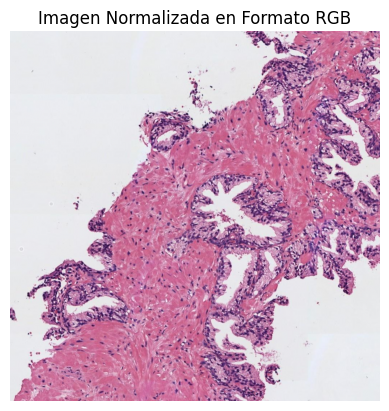

In [2]:
import requests
import matplotlib.pyplot as plt
from skimage import io
from io import BytesIO

# URL de la imagen en GitHub
image_url = 'https://github.com/jagvgithub/Aprendizaje_supervisado/raw/main/histo_1.jpg'

# Descargar la imagen
response = requests.get(image_url)
image = io.imread(BytesIO(response.content))

# Normalizar la imagen para que los píxeles se encuentren en el rango [0, 1]
image_normalized = image / 255.0

# Asegurarse de que la imagen esté en formato RGB
if len(image_normalized.shape) == 2:  # La imagen es en escala de grises
    image_normalized = io.gray2rgb(image_normalized)
elif image_normalized.shape[2] == 4:  # La imagen tiene un canal alfa (RGBA)
    image_normalized = image_normalized[:, :, :3]

# Visualizar la imagen
plt.imshow(image_normalized)
plt.axis('off')  # Ocultar los ejes
plt.title('Imagen Normalizada en Formato RGB')
plt.show()


# 1) Realizar una transformación de color para convertir la imagen al espacio de color CMYK

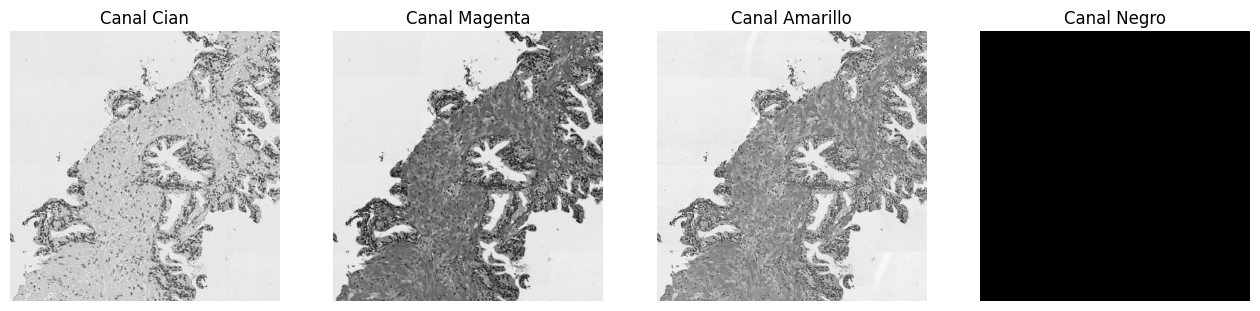

In [11]:
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from skimage import io
from PIL import Image

# URL de la imagen en GitHub
image_url = 'https://github.com/jagvgithub/Aprendizaje_supervisado/raw/main/histo_1.jpg'

# Descargar la imagen
response = requests.get(image_url)
image_np = io.imread(BytesIO(response.content))

# Convertir la imagen numpy.ndarray a PIL.Image
image_pil = Image.fromarray((image_np * 255).astype('uint8'))

# Convertir la imagen al espacio de color CMYK
image_cmyk = image_pil.convert('CMYK')

# Obtener los canales CMYK
c, m, y, k = image_cmyk.split()

# Visualizar los canales CMYK
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
axes[0].imshow(c, cmap='gray')
axes[0].set_title('Canal Cian')
axes[0].axis('off')

axes[1].imshow(m, cmap='gray')
axes[1].set_title('Canal Magenta')
axes[1].axis('off')

axes[2].imshow(y, cmap='gray')
axes[2].set_title('Canal Amarillo')
axes[2].axis('off')

axes[3].imshow(k, cmap='gray')
axes[3].set_title('Canal Negro')
axes[3].axis('off')

plt.show()


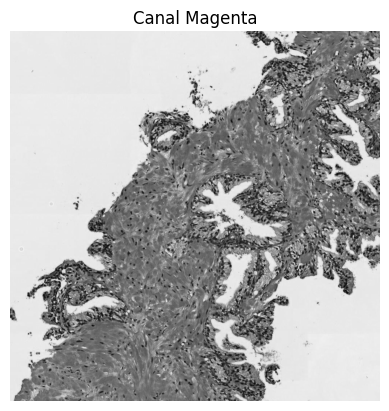

In [12]:
# Convertir la imagen numpy.ndarray a PIL.Image
image_pil = Image.fromarray((image_np * 255).astype('uint8'))

# Convertir la imagen al espacio de color CMYK
image_cmyk = image_pil.convert('CMYK')

# Obtener el canal magenta
_, magenta, _, _ = image_cmyk.split()

# Visualizar el canal magenta
plt.imshow(magenta, cmap='gray')
plt.axis('off')  # Ocultar los ejes
plt.title('Canal Magenta')
plt.show()

# 2) Umbralizar la imagen para separar los píxeles del fondo de la región tisular

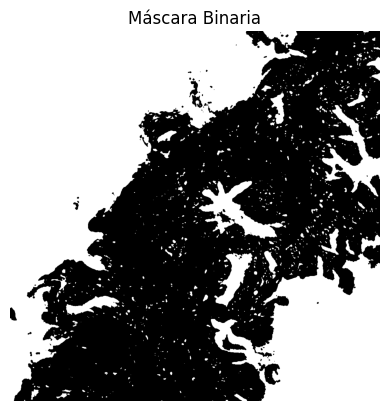

In [23]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2  # OpenCV para aplicar el filtro gaussiano y el método de Otsu

# Convertir la imagen numpy.ndarray a PIL.Image
image_pil = Image.fromarray((image_np * 255).astype('uint8'))

# Convertir la imagen al espacio de color CMYK
image_cmyk = image_pil.convert('CMYK')

# Obtener el canal magenta
_, magenta, _, _ = image_cmyk.split()

# Convertir la imagen de PIL a numpy array
magenta_np = np.array(magenta)

# Aplicar filtro gaussiano
magenta_blur = cv2.GaussianBlur(magenta_np, (5, 5), 0)

# Aplicar el método de Otsu
_, mask = cv2.threshold(magenta_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Visualizar la máscara binaria resultante
plt.imshow(mask, cmap='gray')
plt.axis('off')  # Ocultar los ejes
plt.title('Máscara Binaria')
plt.show()

# 3) Limpiar la imagen eliminando los artefactos de lumen (objetos blancos pequeños que no son lúmenes)

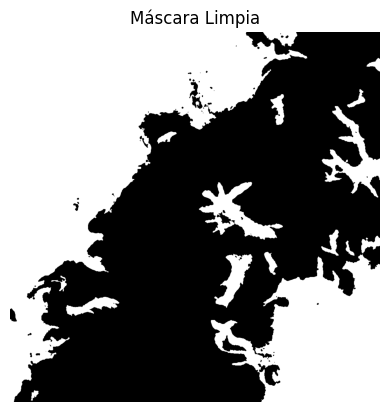

In [27]:
# Utilizar la librería skimage.morphology.remove_small_objects para eliminar aquellos objetos cuya área sea menor a 300 píxeles
# Más información en https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.remove_small_objects
# Visualizaer la máscara resultante
# Convertir la máscara a formato booleano

mask_bool = mask.astype(bool)

# Eliminar objetos pequeños
mask_cleaned = remove_small_objects(mask_bool, min_size=300)

# Convertir la máscara limpiada de nuevo a uint8 para visualizar
mask_cleaned_uint8 = (mask_cleaned * 255).astype('uint8')

# Visualizar la máscara limpia
plt.imshow(mask_cleaned_uint8, cmap='gray')
plt.axis('off')  # Ocultar los ejes
plt.title('Máscara Limpia')
plt.show()

# 4) Rellenar con 0s el fondo de la imagen para quedarnos únicamente con los lúmenes

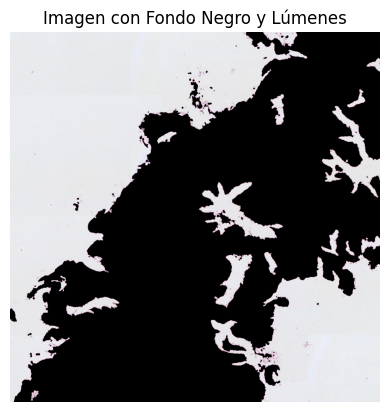

In [30]:
#Rellenar con 0s el fondo de la imagen para quedarnos únicamente con los lúmenes

# Convertir la máscara limpia a formato booleano
mask_cleaned_bool = mask_cleaned.astype(bool)

# Crear una imagen en negro del mismo tamaño que la imagen original
image_lumen_only = np.zeros_like(image_np)

# Aplicar la máscara limpia a la imagen original para dejar solo los lúmenes
image_lumen_only[mask_cleaned_bool] = image_np[mask_cleaned_bool]

# Visualizar la imagen resultante con el fondo en negro
plt.imshow(image_lumen_only, cmap='gray')
plt.axis('off')  # Ocultar los ejes
plt.title('Imagen con Fondo Negro y Lúmenes')
plt.show()



# 5) Rellenar los objetos de los lúmenes

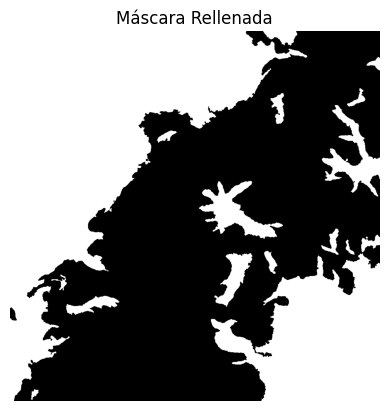

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import remove_small_objects
from scipy.ndimage import binary_fill_holes

# Supongamos que image_np es tu imagen inicial en formato numpy.ndarray

# Máscara binaria obtenida tras aplicar el método de Otsu y limpiar objetos pequeños
mask_cleaned_bool = mask_cleaned.astype(bool)

# Rellenar los lúmenes en la máscara limpia
mask_filled = binary_fill_holes(mask_cleaned_bool)

# Convertir la máscara rellenada de nuevo a uint8 para visualizar
mask_filled_uint8 = (mask_filled * 255).astype('uint8')

# Visualizar la máscara rellenada
plt.imshow(mask_filled_uint8, cmap='gray')
plt.axis('off')  # Ocultar los ejes
plt.title('Máscara Rellenada')
plt.show()


# 6) Detectar y dibujar los contornos de los lúmenes sobre la imagen original

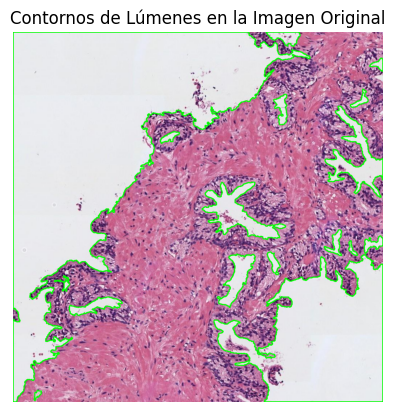

In [34]:
# Convertir la máscara rellenada de nuevo a uint8 para detectar contornos
mask_filled_uint8 = (mask_filled * 255).astype('uint8')

# Detectar contornos
contours, _ = cv2.findContours(mask_filled_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar contornos en la imagen original (en verde)
image_contours = (image_normalized * 255).astype('uint8').copy()
cv2.drawContours(image_contours, contours, -1, (0, 255, 0), 2)

# Visualizar la imagen con los contornos dibujados
plt.imshow(image_contours)
plt.axis('off')  # Ocultar los ejes
plt.title('Contornos de Lúmenes en la Imagen Original')
plt.show()

# 7) Identificar y cropear el lumen más grande

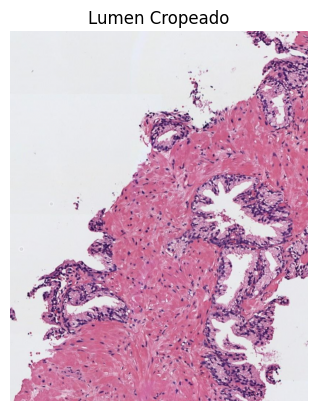

In [35]:
# Detectar contornos
contours, _ = cv2.findContours(mask_filled_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Encontrar el contorno con el área más grande
largest_contour = max(contours, key=cv2.contourArea)

# Obtener el bounding box del contorno más grande
x, y, w, h = cv2.boundingRect(largest_contour)

# Hacer un crop de la imagen original RGB utilizando el bounding box
cropped_lumen = image_normalized[y:y+h, x:x+w]

# Visualizar el lumen cropeado
plt.imshow(cropped_lumen)
plt.axis('off')  # Ocultar los ejes
plt.title('Lumen Cropeado')
plt.show()

# Extraer 13 características geométricas que permitan caracterizar el lumen recortado

In [39]:

import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
from scipy.ndimage import binary_fill_holes
from skimage.morphology import remove_small_objects
from io import BytesIO
import requests
from skimage.measure import regionprops, label
import math

# Calcular las dimensiones del lumen cropeado
height, width, _ = cropped_lumen.shape

# Visualizar las dimensiones
print(f"Dimensiones del lumen cropeado: Altura = {height} píxeles, Ancho = {width} píxeles")

# Obtener las propiedades de la región usando regionprops
labeled_crop = label(mask_filled[y:y+h, x:x+w])
props = regionprops(labeled_crop)[0]

# Área
area = props.area

# Área de la bounding box
bounding_box_area = props.bbox_area

# Área convexa
convex_area = props.convex_area

# Excentricidad
eccentricity = props.eccentricity

# Diámetro equivalente
equivalent_diameter = props.equivalent_diameter

# Extensión
extent = props.extent

# Perímetro
perimeter = props.perimeter

# Longitud del eje mayor
major_axis_length = props.major_axis_length

# Longitud del eje menor
minor_axis_length = props.minor_axis_length

# Orientación
orientation = props.orientation

# Solidez
solidity = props.solidity

# Compacidad
compactness = perimeter**2 / (4 * math.pi * area)

# Para el Diámetro de Feret necesitamos calcular la distancia máxima entre puntos del contorno
contour = largest_contour - [y, x]  # Ajustar los contornos al crop
diameter_feret = max([cv2.norm(contour[i] - contour[j]) for i in range(len(contour)) for j in range(i+1, len(contour))])

# Redondear los valores hasta el cuarto decimal
features = {
    'Área': round(area, 4),
    'Área de la bounding box': round(bounding_box_area, 4),
    'Área convexa': round(convex_area, 4),
    'Excentricidad': round(eccentricity, 4),
    'Diámetro equivalente': round(equivalent_diameter, 4),
    'Extensión': round(extent, 4),
    'Diámetro Feret': round(diameter_feret, 4),
    'Longitud del eje mayor': round(major_axis_length, 4),
    'Longitud del eje menor': round(minor_axis_length, 4),
    'Orientación': round(orientation, 4),
    'Perímetro': round(perimeter, 4),
    'Solidez': round(solidity, 4),
    'Compacidad': round(compactness, 4)
}

display(features)

Dimensiones del lumen cropeado: Altura = 1024 píxeles, Ancho = 823 píxeles


{'Área': 318648.0,
 'Área de la bounding box': 842752.0,
 'Área convexa': 452672.0,
 'Excentricidad': 0.8566,
 'Diámetro equivalente': 636.9578,
 'Extensión': 0.3781,
 'Diámetro Feret': 1259.6071,
 'Longitud del eje mayor': 1084.8243,
 'Longitud del eje menor': 559.802,
 'Orientación': -0.5868,
 'Perímetro': 5020.3761,
 'Solidez': 0.7039,
 'Compacidad': 6.2944}